In [1]:
# download data of xray 
!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a

Downloading...
From: https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
To: /content/Covid_Data_GradientCrescent.zip
154MB [00:03, 48.6MB/s]


In [0]:
!unzip /content/Covid_Data_GradientCrescent.zip

In [0]:
import numpy as np
import tensorflow as tf
train_dir = '/content/two/train'
test_dir = '/content/two/test'
img_size = (150, 150)
batch_size = 10 
epoch = 20
learning_rate = 0.0005

In [10]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

train_data = ImageDataGenerator(rescale = 1./255,
                                rotation_range=50,
                                featurewise_center = True,
                                featurewise_std_normalization = True,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.25,
                                zoom_range=0.1,
                                zca_whitening = True,
                                channel_shift_range = 20,
                                horizontal_flip = True ,
                                vertical_flip = True ,
                                validation_split = 0.2,
                                fill_mode='constant')

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [11]:
train_generator = train_data.flow_from_directory(train_dir, 
                                                 target_size = img_size,
                                                 shuffle = True,
                                                 batch_size = batch_size,
                                                 subset = 'training',
                                                 class_mode = 'binary') 
valid_generator = train_data.flow_from_directory(train_dir,
                                                 target_size = img_size,
                                                 shuffle = True,
                                                 batch_size = batch_size,
                                                 subset = 'validation',
                                                 class_mode = 'binary') #2binary

Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.layers.core import Flatten, Dense, Dropout, Lambda

In [0]:
base = tf.keras.applications.VGG16(weights = 'imagenet',
             include_top = False,
             input_shape = (150, 150, 3))
base.trainable = False

In [0]:
model = Sequential()
model.add(base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

In [0]:
ss_train = train_generator.n//train_generator.batch_size
ss_valid = valid_generator.n//valid_generator.batch_size

In [19]:
output = model.fit_generator(train_generator,
                             steps_per_epoch = ss_train,
                             validation_data = valid_generator,
                             validation_steps = ss_valid,
                             epochs = epoch
                             )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
10/10 [==============================] - 4s 370ms/step - loss: 2.0162 - accuracy: 0.4574 - val_loss: 0.7692 - val_accuracy: 0.4500
Epoch 2/20
10/10 [==============================] - 3s 308ms/step - loss: 0.7121 - accuracy: 0.5426 - val_loss: 0.6435 - val_accuracy: 0.5500
Epoch 3/20
10/10 [==============================] - 3s 322ms/step - loss: 0.5675 - accuracy: 0.6915 - val_loss: 0.4230 - val_accuracy: 0.9500
Epoch 4/20
10/10 [==============================] - 3s 344ms/step - loss: 0.4791 - accuracy: 0.7979 - val_loss: 0.3726 - val_accuracy: 0.9000
Epoch 5/20
10/10 [==============================] - 3s 330ms/step - loss: 0.4469 - accuracy: 0.7872 - val_loss: 0.2785 - val_accuracy: 0.9000
Epoch 6/20
10/10 [==============================] - 4s 361ms/step - loss: 0.2856 - accuracy: 0.9149 - val_loss: 0.4117 - val_accuracy: 0.8500
Epoch 7/20
10/10 [==============================] - 3s 317ms/step - loss: 0.2973 - accuracy: 0.8936 - val_loss: 0.2668 - val_accuracy: 0.8500
Epoch 

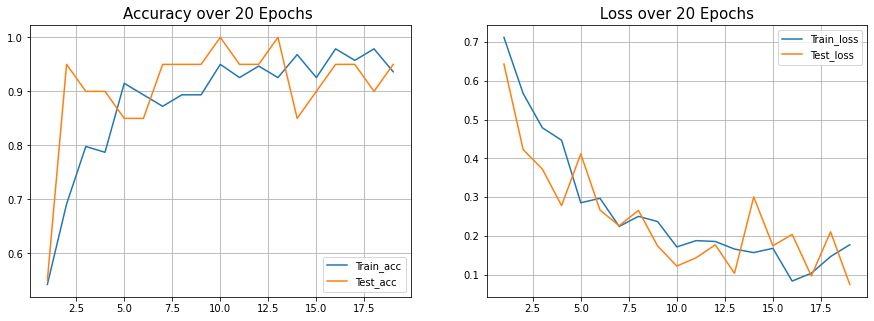

In [20]:
import matplotlib.pyplot as plt
def plot_acc_loss(output, epochs):
 acc = output.history['accuracy']
 loss = output.history['loss']
 val_acc = output.history['val_accuracy']
 val_loss = output.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) +  ' Epochs ', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title(' Loss over ' + str(epochs) + ' Epochs ', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(output, 20)

In [22]:
test_generator = ImageDataGenerator(rescale = 1./255)
evaluation = test_generator.flow_from_directory(test_dir,
                                                target_size = img_size,
                                                batch_size = 1,
                                                shuffle = True,
                                                seed = 0,
                                                class_mode = 'binary')#4
x = model.evaluate_generator(evaluation,
                            steps = np.ceil(len(evaluation)/batch_size),
                            use_multiprocessing = False,
                            verbose = 1,
                            workers=1)
print('Test loss: ' , x[0])
print('Test accuracy: ',x[1])

Found 18 images belonging to 2 classes.
2/2 [==============================] - 0s 17ms/step - loss: 0.1989 - accuracy: 1.0000
Test loss:  0.19885440170764923
Test accuracy:  1.0
